In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import data

In [10]:
df = pd.read_csv('C:/Users/William Alan Cahyadi/Downloads/UTS MODEL/data_C.csv')
df

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,157138,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,1,116144,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,2,145603,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,3,79929,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,4,52554,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41253,41253,55217,15641043,Onyemere,641.0,Germany,Male,38.0,2,138166.30,2,0,1,69227.66,0
41254,41254,110969,15674541,Robinson,575.0,France,Male,52.0,8,0.00,2,0,1,111342.66,0
41255,41255,132494,15700601,Kao,571.0,France,Male,34.0,1,119452.03,2,1,1,173511.72,0
41256,41256,31177,15806926,Nkemjika,624.0,France,Male,38.0,4,0.00,1,0,0,40320.30,0


Explore the data

In [11]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,157138,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,1,116144,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,2,145603,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,3,79929,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,4,52554,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41246 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [13]:
df.describe()

,Unnamed: 0,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41258.00000,41258.000000,4.125800e+04,41246.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000
mean,20628.50000,82629.935091,1.569218e+07,655.802890,38.165611,5.036308,55308.965471,1.556038,0.754011,0.496776,112507.486040,0.214455
std,11910.30304,47642.122777,7.136319e+04,79.736298,8.947665,2.817831,62795.530950,0.548029,0.430677,0.499996,50048.666663,0.410449
min,0.00000,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,10314.25000,41377.500000,1.563298e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74564.410000,0.000000
50%,20628.50000,82802.500000,1.569070e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117616.290000,0.000000
75%,30942.75000,123737.250000,1.575662e+07,710.000000,42.750000,7.000000,119785.395000,2.000000,1.000000,1.000000,154700.647500,0.000000
max,41257.00000,165032.000000,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [18]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [19]:
df.shape

(41258, 15)

In [20]:
df.isna().sum()

Unnamed: 0          0
id                  0
CustomerId          0
Surname             0
CreditScore        12
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

Ada 12 missing value yang harus dihandle dengan cara menggantikannya dengan nilai mean dari kategori tersebut

In [21]:
df.duplicated().sum()

0

Tidak ada data duplicate

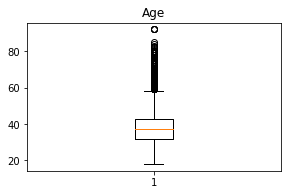

In [23]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.boxplot(df['Age'])
plt.title('Age')

plt.show()

Outlier di kategori umur berada pada usia 60 ke atas.|

Karena terdapat 12 missing value, maka kita lakukan hal di bawah ini

In [25]:
mean_cs = df['CreditScore'].mean()

# Ganti null data dengan mean dari credit score
df['CreditScore'].fillna(mean_cs, inplace=True)

In [26]:
df["CreditScore"].isnull().sum()

0

Terbukti bahwa missing value sudah dihandle dengan baik, sehingga data sudah tidak memiliki null data

Setelah itu, kita perlu melihat persebaran warga negara yang merupakan nasabah di bank ini

<AxesSubplot:xlabel='Geography', ylabel='count'>

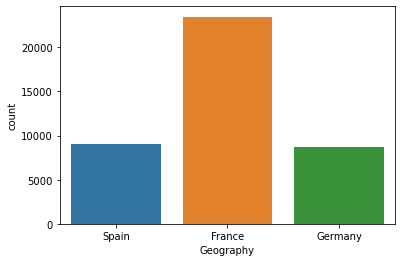

In [31]:
sns.countplot(x='Geography', data=df)

Hal di atas menggambarkan jumlah nasabah sepenuhnya, tapi kita juga perlu melihat berapa banyak nasabah yang tetap dan nasabah yang meninggalkan bank

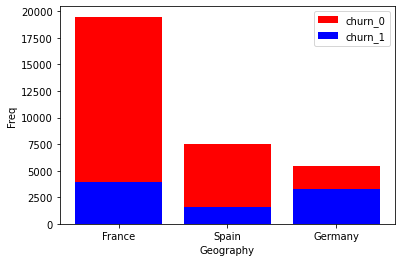

In [43]:
churn_0 = df[df['churn'] == 0]
churn_1 = df[df['churn'] == 1]
churn_0_active = churn_0['Geography'].value_counts()
churn_1_active = churn_1['Geography'].value_counts()

plt.bar(churn_0_active.index, churn_0_active.values, label='churn_0', color='red')
plt.bar(churn_1_active.index, churn_1_active.values, label='churn_1', color='blue')
plt.xlabel('Geography')
plt.ylabel('Freq')
plt.legend()
plt.show()

Hal ini menunjukkan bahwa nasabah yang berasal dari jerman memiliki persentase churn 1 yang lebih tinggi dibanding dengan persentase negara lain

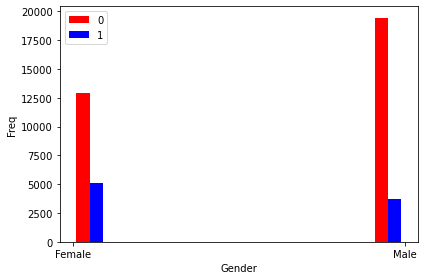

In [47]:
gender_churn_0 = df[df.churn==0]['Gender']
gender_churn_1 = df[df.churn==1]['Gender']

plt.xlabel('Gender')
plt.ylabel('Freq')
plt.hist([gender_churn_0, gender_churn_1], color=['red', 'blue'], label=['0', '1'])
plt.tight_layout()
plt.legend()

Data Preprocessing

Saya akan melakukan feature engineering dan drop beberapa kolom yang tidak berguna terhadap hasil dari model tersebut

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41258 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [53]:
df = df.drop(columns=['Unnamed: 0', 'CustomerId', 'id', 'Surname'])

KeyError: "['Unnamed: 0', 'CustomerId', 'id', 'Surname'] not found in axis"

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41258 non-null  float64
 1   Geography        41258 non-null  object 
 2   Gender           41258 non-null  object 
 3   Age              41258 non-null  float64
 4   Tenure           41258 non-null  int64  
 5   Balance          41258 non-null  float64
 6   NumOfProducts    41258 non-null  int64  
 7   HasCrCard        41258 non-null  int64  
 8   IsActiveMember   41258 non-null  int64  
 9   EstimatedSalary  41258 non-null  float64
 10  churn            41258 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 3.5+ MB


In [55]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


Setelah proses feature engineering selesai, maka kita akan melakukan proses split data dengan ketentuan test 2:8 train

In [57]:
X = df.drop(columns="churn")
y = df.churn

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, 
                                                    stratify=y,
                                                    random_state=42)

In [58]:
y_train.value_counts()

0    25928
1     7078
Name: churn, dtype: int64

In [59]:
y_test.value_counts()

0    6482
1    1770
Name: churn, dtype: int64

In [65]:
df_encode= {"Gender": 
            {"Male":1,
            "Female" :0}}
X_train= X_train.replace(df_encode)

X_test= X_test.replace(df_encode)

In [68]:
import pickle as pkl
filee = 'buatgender.pkl'
pkl.dump(df_encode, open(filee, 'wb'))

In [67]:
from sklearn.preprocessing import OneHotEncoder

geoencode_train = X_train[['Geography']]
geoencode_test = X_test[['Geography']]
trainencode_geo = OneHotEncoder()

geoencode_train = pd.DataFrame(trainencode_geo.fit_transform(geoencode_train).toarray(), 
                             columns=trainencode_geo.get_feature_names_out())
geoencode_test = pd.DataFrame(trainencode_geo.transform(geoencode_test).toarray(), 
                            columns=trainencode_geo.get_feature_names_out())

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train = pd.concat([X_train, geoencode_train], axis=1)
X_test = pd.concat([X_test, geoencode_test], axis=1)
X_train.drop(columns=['Geography'], inplace=True)
X_test.drop(columns=['Geography'], inplace=True)

In [69]:
filee_geo = 'geographyencode.pkl'
pkl.dump(trainencode_geo, open(filee_geo, 'wb'))

In [71]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
robscale = RobustScaler()
minmaxscale = MinMaxScaler()

#Scaling dengan robust untuk outlier
X_train[['Age', 'CreditScore']] = robscale.fit_transform(X_train[['Age', 'CreditScore']])
X_test[['Age', 'CreditScore']] = robscale.transform(X_test[['Age', 'CreditScore']])

X_train[['Balance', 'EstimatedSalary']] = minmaxscale.fit_transform(X_train[['Balance', 'EstimatedSalary']])
X_test[['Balance', 'EstimatedSalary']] = minmaxscale.transform(X_test[['Balance', 'EstimatedSalary']])

In [72]:
filee_robust = 'robscale.pkl'
pkl.dump(robscale, open(filee_robust, 'wb'))

filee_minmax = 'minmaxscale.pkl'
pkl.dump(minmaxscale, open(filee_minmax, 'wb'))

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
RanFor = RandomForestClassifier()
RanFor.fit(X_train, y_train)

RandomForestClassifier()

Kemudian kita buat classification reportnya

In [77]:
y_predictforRanFor = RanFor.predict(X_test)
print('Classification Report untuk Random Forest')
print('')
print(classification_report(y_test, y_predictforRanFor))

Classification Report untuk Random Forest

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6482
           1       0.72      0.53      0.61      1770

    accuracy                           0.85      8252
   macro avg       0.80      0.74      0.76      8252
weighted avg       0.84      0.85      0.85      8252



Lakukan tuning untuk random forest

In [84]:
from sklearn.model_selection import GridSearchCV
param = {'crit':['entropy', 'gini', 'log_loss'], 'max_depth':[2,4,6,8]}

In [85]:
RanFor2 = RandomForestClassifier()

In [86]:
RanFor2 = GridSearchCV(RanFor2, param_grid = param, scoring = 'accuracy', cv=5)

In [90]:
RanForNew = RandomForestClassifier(criterion= 'gini',max_depth=8)
RanForNew.fit(X_train,y_train)
y_predict_best = RanForNew.predict(X_test)

In [109]:
print('Classification Report untuk Random Forest yang sudah ditune')
print('')
print(classification_report(y_test, y_predict_best))

Classification Report untuk Random Forest yang sudah ditune

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6482
           1       0.78      0.50      0.61      1770

    accuracy                           0.86      8252
   macro avg       0.83      0.73      0.76      8252
weighted avg       0.86      0.86      0.85      8252



In [113]:
from sklearn.metrics import roc_auc_score
SMAAUC = RanForNew.predict_proba(X_test)[:, 1]
Skor = roc_auc_score(y_test, SMAAUC)
print("Nilai:", Skor)

Nilai: 0.8873249171543275


Skor Random Forest mendekati arah True Positive

# Xgboost

In [102]:
import xgboost as xgb
rstat = 42
XGBEW = xgb.XGBClassifier(objective='binary:logistic', random_state = rstat)

XGBEW.fit(X_train, y_train)
y_pred = XGBEW.predict(X_test)

In [103]:
print('Classification Report untuk xgboost')
print('')
print(classification_report(y_test, y_pred))

Classification Report untuk xgboost

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6482
           1       0.70      0.55      0.62      1770

    accuracy                           0.85      8252
   macro avg       0.79      0.74      0.76      8252
weighted avg       0.85      0.85      0.85      8252



In [106]:
pararam = {'learning_rate': [0.1, 0.01, 0.001], 'n_est': [100, 200, 300], 'maxdepth': [3, 5, 7]}

grid_search = GridSearchCV(estimator=XGBEW, param_grid=pararam, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
           

In [108]:
XGBNEW = xgb.XGBClassifier(objective='binary:logistic', learning_rate= 0.1, maxdepth= 3, n_est= 200, random_state=rstat)
XGBNEW.fit(X_train, y_train)
y_pred = XGBNEW.predict(X_test)

In [110]:
print('Classification Report untuk xgboost yang sudah ditune')
print('')
print(classification_report(y_test, y_pred))

Classification Report untuk xgboost yang sudah ditune

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6482
           1       0.72      0.56      0.63      1770

    accuracy                           0.86      8252
   macro avg       0.80      0.75      0.77      8252
weighted avg       0.85      0.86      0.85      8252



In [114]:
from sklearn.metrics import roc_auc_score
SMPAUC = XGBNEW.predict_proba(X_test)[:, 1]
Skor2 = roc_auc_score(y_test, SMPAUC)
print("Nilai:", Skor2)

Nilai: 0.886347242341678


Skor XGB juga mendekati arah True Positive

Summary:

Seluruh model memiliki akurasi yang hampir mirip dan baik. Namun tidak bisa sepenuhnya dilihat dari akurasinya, kita harus melihat juga dari precision dan recall valuenya.

Nilai precision yang tinggi menandakan bahwa model dapat memprediksi dengan baik untuk mengurangi false positive, dan recall yang baik digunakan untuk mengurangi value false negative.

Awalnya Random Forest memiliki acc 85% sedangkan setelah ditune naik menjadi 86%, hal ini menandakan bahwa model sebelum dan sesudah ditune memiliki akurasi yang hampir mirip dan tidak terlalu berbeda. Di sisi lain, untuk Xgboost juga memiliki hasil yang sama yaitu 85% untuk sebelum ditune dan 86% setelah ditune.
Namun saya tetap akan memilih untuk menggunakan model Xgboost karena performa tidak hanya dilihat dari akurasi saja, melainkan juga dari recall dan precision valuenya.

In [115]:
filesave = 'XGBOOSTNEW.pkl'
pkl.dump(XGBNEW, open(filesave, 'wb'))